In [1]:
import tabula
import pandas as pd
import xlsxwriter
from matplotlib import pyplot as plt
import json
import matplotlib
import numpy as np

In [2]:
def WriteExcel(df, total, unique, countGA, week):
    writer = pd.ExcelWriter(r'/Users/fabriciovilasboas/source/repos/EBD/xlsx/EstatisticaEBD_' + str(week) + '.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name="Total de contribuições", index=False, header=True)
    total.to_excel(writer, sheet_name="Contagem total GA")
    unique.to_excel(writer, sheet_name="Participantes únicos", index=False)
    countGA.to_excel(writer, sheet_name="Contagem únicos GA")
    writer.save()

In [3]:
def EBDStatistics(week):
    fileName = r'/Users/fabriciovilasboas/source/repos/EBD/raw/ebd_' + str(week) + '.pdf'
    dfRaw = tabula.read_pdf(fileName, pages='all')
    dfList = list()
    for page in range(0,len(dfRaw)):
        df = pd.DataFrame()
        if page == 0:
            df = dfRaw[page][['Unnamed: 0', 'Unnamed: 1']]
            df.columns = df.iloc[0]
            df = df[1:]
            df.where(df['Membro'] != 'Membro', inplace=True)
        else:
            df = dfRaw[page][['Membro', 'G.A']]
        dfList.append(df)
    df = pd.concat(dfList)
    print(df)
    df.where(df['G.A'] != 'GA-02- Dalton Douglas da Silva', inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)

    total = df.groupby('G.A').count()

    unique = df.drop_duplicates().sort_values(by=['G.A', 'Membro'])

    countGA = unique.groupby('G.A').count()

    return df, total, unique, countGA

In [4]:
def PlotCountGA(week,countGA):
    title = "Semana " + str(week)
    countGA.plot(title=title, kind='pie', y='Membro', autopct='%1.1f%%', startangle=90, shadow=False, labels=countGA.index, legend = False, fontsize=12, figsize=(10,10))
    plt.savefig('/Users/fabriciovilasboas/source/repos/EBD/fig/week_' + str(week) + '.png')

0                                Membro                             G.A
1      ALEXANDRE DE OLIVEIRA DOS SANTOS  GA-02- Dalton Douglas da Silva
2             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
3             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
4             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
5             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
6       CLAYTON VINICIUS SOARES SANTANA                    G5 - Clayton
7   CRISTIANE PATRICIO DA COSTA AZEVEDO                       G6 - Ivan
8   CRISTIANE PATRICIO DA COSTA AZEVEDO                       G6 - Ivan
9      DANIEL VITOR PIO BARBOSA SANTANA                    G5 - Clayton
10       DELAIAS ELIANDRA NEIVA SANTANA                    G5 - Clayton
11                EDUARDO BRAGA CEGLIAS                    G4 - Eduardo
12               ELENICE SANTANA BORGES                       G6 - Ivan
13               ELENICE SANTANA BORGES                       G6

0                                Membro                             G.A
1      ALEXANDRE DE OLIVEIRA DOS SANTOS  GA-02- Dalton Douglas da Silva
2             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
3       CLAYTON VINICIUS SOARES SANTANA                    G5 - Clayton
4   CRISTIANE PATRICIO DA COSTA AZEVEDO                       G6 - Ivan
5      DANIEL VITOR PIO BARBOSA SANTANA                    G5 - Clayton
6        DELAIAS ELIANDRA NEIVA SANTANA                    G5 - Clayton
7                 EDUARDO BRAGA CEGLIAS                    G4 - Eduardo
8                ELENICE SANTANA BORGES                       G6 - Ivan
9                ELENICE SANTANA BORGES                       G6 - Ivan
10    ERICKA AREIAS D FREITAS FRANCISCO                    G1 - Matheus
11             HADASSA PIO SANTANA DIAS                    G1 - Matheus
12                     ISABELLA SANTANA                    G5 - Clayton
13          IVAN APARECIDO ROZA PIMENTA                       G6

0                               Membro                             G.A
1     ALEXANDRE DE OLIVEIRA DOS SANTOS  GA-02- Dalton Douglas da Silva
2            CARMEN LUCY ALVES MARTINS                     G2 - Thomas
3                EDUARDO BRAGA CEGLIAS                    G4 - Eduardo
4               ELENICE SANTANA BORGES                       G6 - Ivan
5               ELENICE SANTANA BORGES                       G6 - Ivan
6        JOAO LEOPOLDO DE MENEZES NETO                       G6 - Ivan
7    LETÍCIA CRISTINA ALVES DOS SANTOS  GA-02- Dalton Douglas da Silva
8   LÍDIA MARIA SILVEIRA CASTRO CRESPI                    G1 - Matheus
9   LÍDIA MARIA SILVEIRA CASTRO CRESPI                    G1 - Matheus
10  LÍDIA MARIA SILVEIRA CASTRO CRESPI                    G1 - Matheus
11      LÍVEA ZARANTONELLI DE OLIVEIRA                    G4 - Eduardo
12      LÍVEA ZARANTONELLI DE OLIVEIRA                    G4 - Eduardo
13      LÍVEA ZARANTONELLI DE OLIVEIRA                    G4 - Eduardo
14    

0                                Membro                             G.A
1      ALEXANDRE DE OLIVEIRA DOS SANTOS  GA-02- Dalton Douglas da Silva
2             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
3             CARMEN LUCY ALVES MARTINS                     G2 - Thomas
4       CLAYTON VINICIUS SOARES SANTANA                    G5 - Clayton
5   CRISTIANE PATRICIO DA COSTA AZEVEDO                       G6 - Ivan
6   CRISTIANE PATRICIO DA COSTA AZEVEDO                       G6 - Ivan
7        DELAIAS ELIANDRA NEIVA SANTANA                    G5 - Clayton
8                 EDUARDO BRAGA CEGLIAS                    G4 - Eduardo
9                ELENICE SANTANA BORGES                       G6 - Ivan
10               ELENICE SANTANA BORGES                       G6 - Ivan
11                ERICA LUCIANA MARTINS                       G6 - Ivan
12                ERICA LUCIANA MARTINS                       G6 - Ivan
13                ERICA LUCIANA MARTINS                       G6

                             Membro            G.A
1         CARMEN LUCY ALVES MARTINS    G2 - Thomas
2         CARMEN LUCY ALVES MARTINS    G2 - Thomas
3         CARMEN LUCY ALVES MARTINS    G2 - Thomas
4   CLAYTON VINICIUS SOARES SANTANA   G5 - Clayton
5    DELAIAS ELIANDRA NEIVA SANTANA   G5 - Clayton
6               DOROTHY MOTTA NEVES      G6 - Ivan
7             EDUARDO BRAGA CEGLIAS   G4 - Eduardo
8            ELENICE SANTANA BORGES      G6 - Ivan
9            ELENICE SANTANA BORGES      G6 - Ivan
10            ERICA LUCIANA MARTINS      G6 - Ivan
11            ERICA LUCIANA MARTINS      G6 - Ivan
12            ERICA LUCIANA MARTINS      G6 - Ivan
13                 ISABELLA SANTANA   G5 - Clayton
14                 ISABELLA SANTANA   G5 - Clayton
15      IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
16      IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
17      IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
18      IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
19      IVAN APARECIDO ROZA PIM

                                Membro            G.A
1               CARLOS FERREIRA XAVIER   G1 - Matheus
2            CARMEN LUCY ALVES MARTINS    G2 - Thomas
3      CLAYTON VINICIUS SOARES SANTANA   G5 - Clayton
4                EDUARDO BRAGA CEGLIAS   G4 - Eduardo
5               ELENICE SANTANA BORGES      G6 - Ivan
6               ELENICE SANTANA BORGES      G6 - Ivan
7                ERICA LUCIANA MARTINS      G6 - Ivan
8    ERICKA AREIAS D FREITAS FRANCISCO   G1 - Matheus
9             HADASSA PIO SANTANA DIAS   G1 - Matheus
10                     HELOÍSA PRESTES      G6 - Ivan
11                    ISABELLA SANTANA   G5 - Clayton
12         IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
13         IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
14         IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
15         IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
16         IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
17         IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
18         IVAN APARECIDO RO

/Users/fabriciovilasboas/miniconda3/envs/icm/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


                                    Membro            G.A
1            ANE LEOPOLDO DEGROSSE MENEZES      G6 - Ivan
2                   CARLOS FERREIRA XAVIER   G1 - Matheus
3                   CARLOS FERREIRA XAVIER   G1 - Matheus
4                CARMEN LUCY ALVES MARTINS    G2 - Thomas
5                CARMEN LUCY ALVES MARTINS    G2 - Thomas
6          CLAYTON VINICIUS SOARES SANTANA   G5 - Clayton
7      CRISTIANE PATRICIO DA COSTA AZEVEDO      G6 - Ivan
8         DANIEL VITOR PIO BARBOSA SANTANA   G5 - Clayton
9           DELAIAS ELIANDRA NEIVA SANTANA   G5 - Clayton
10                   ERICA LUCIANA MARTINS      G6 - Ivan
11       ERICKA AREIAS D FREITAS FRANCISCO   G1 - Matheus
12                        ISABELLA SANTANA   G5 - Clayton
13             IVAN APARECIDO ROZA PIMENTA      G6 - Ivan
14            JANY OCAMPO DE SOUZA PAULINO   G4 - Eduardo
15           JOAO LEOPOLDO DE MENEZES NETO      G6 - Ivan
16  JOÃO LEOPOLDO DEGROSSE MENEZES (FILHO)      G6 - Ivan
17            

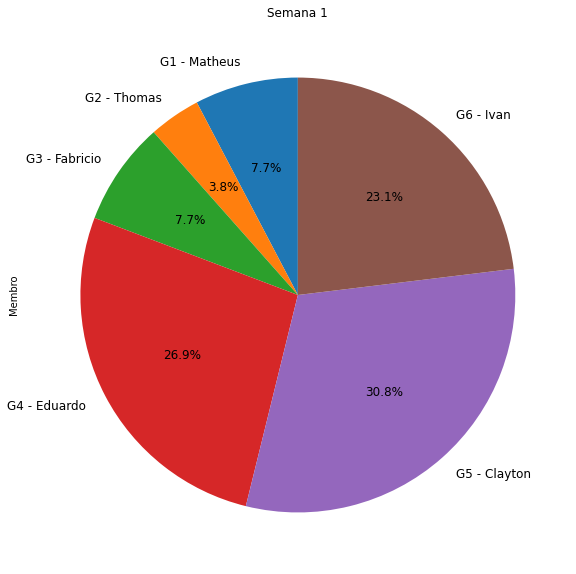

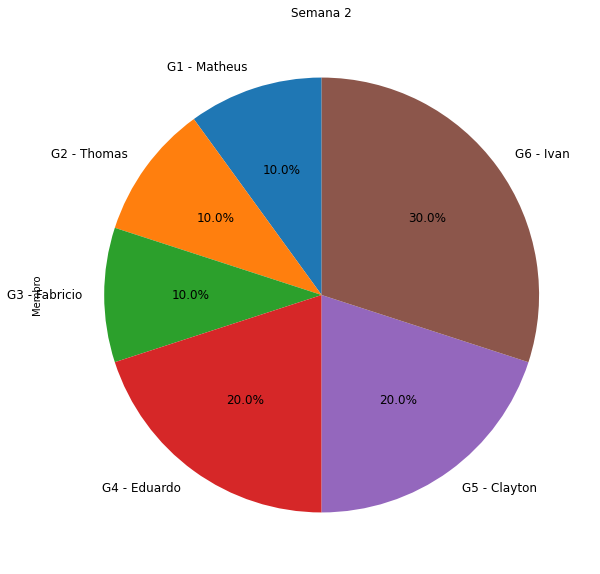

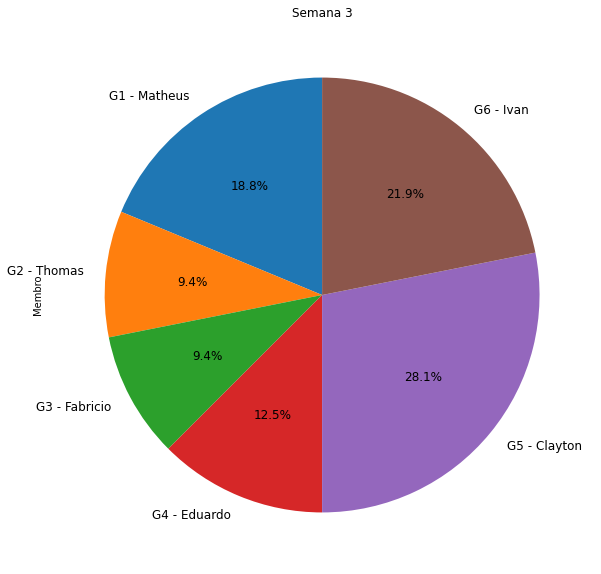

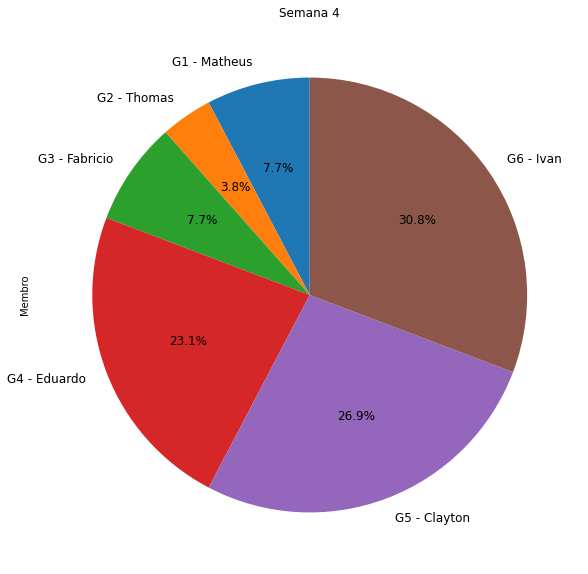

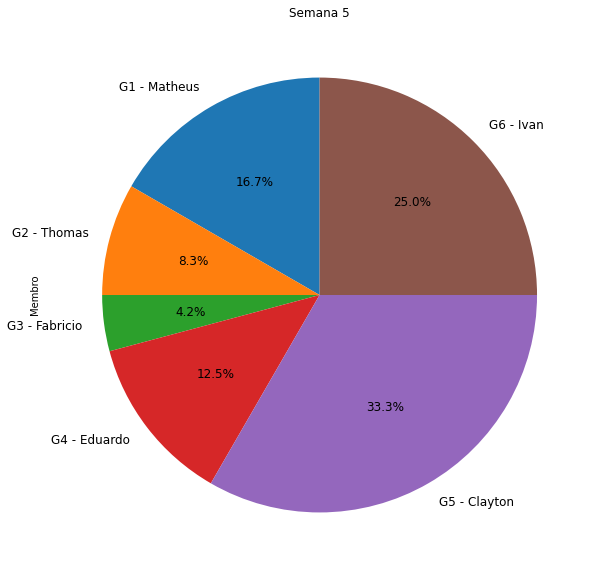

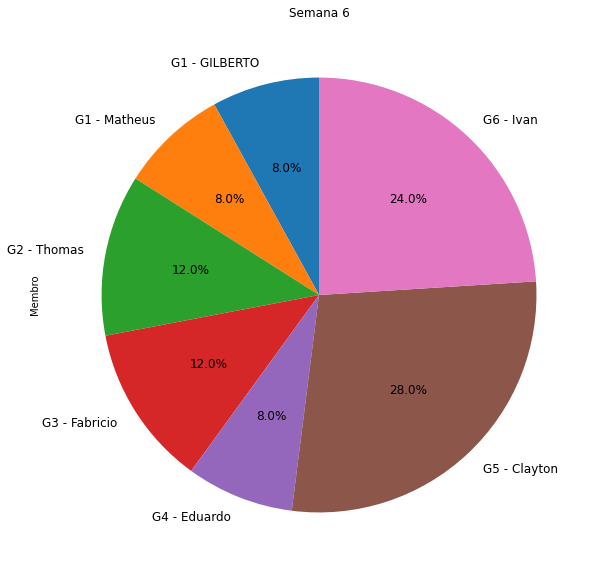

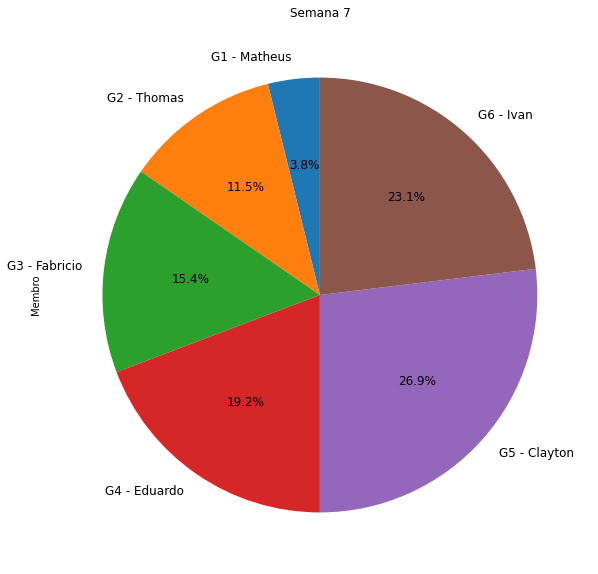

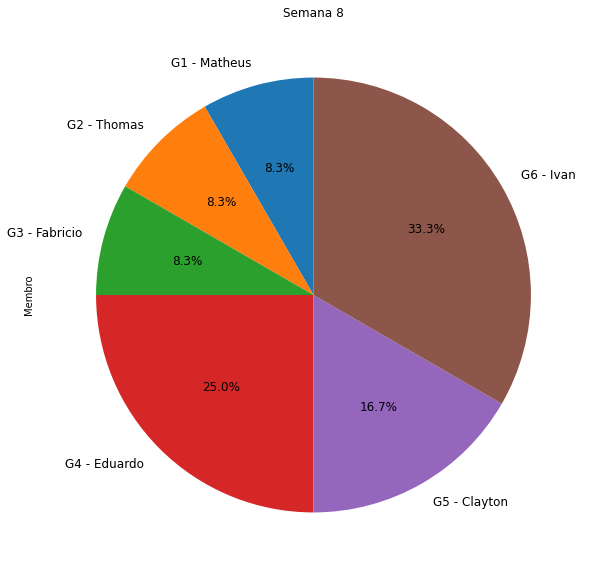

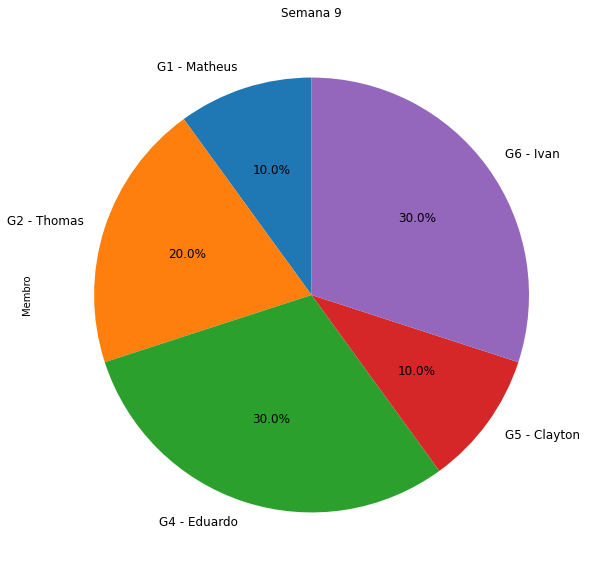

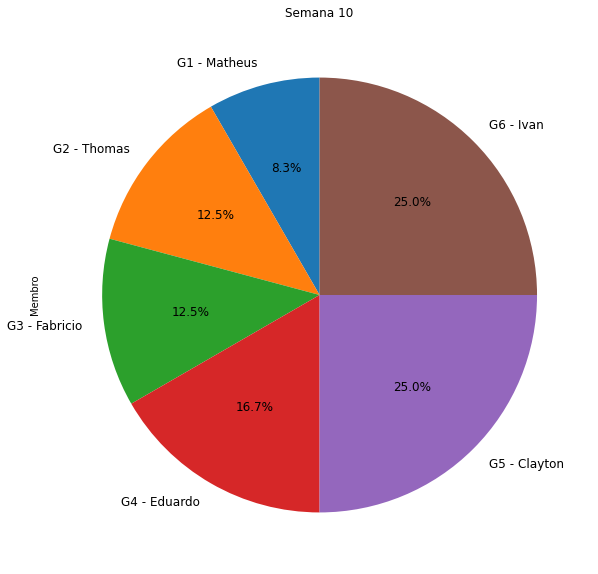

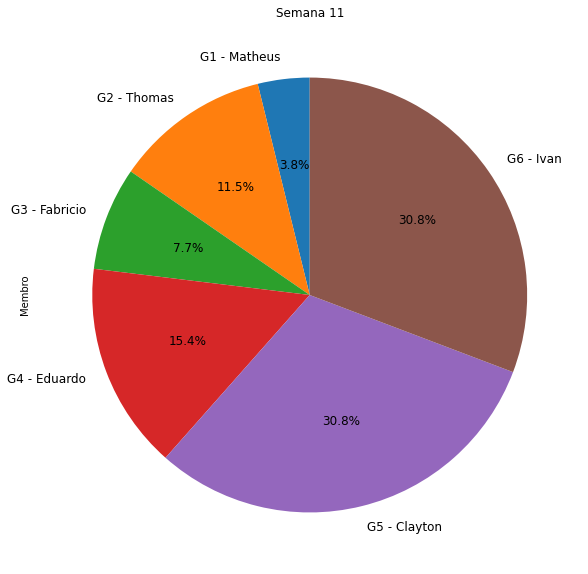

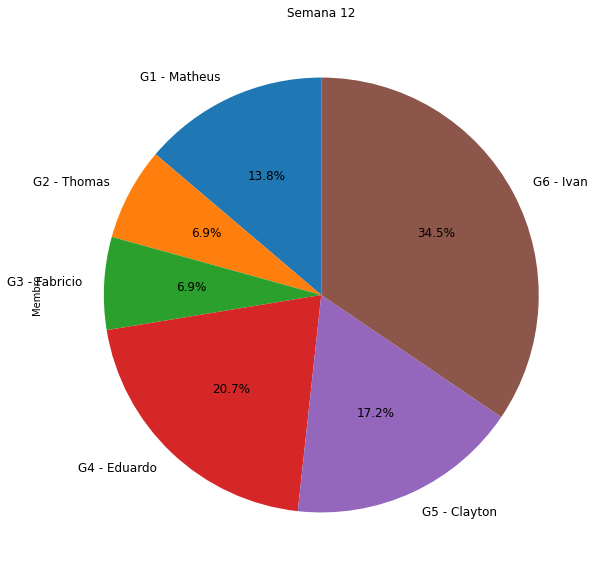

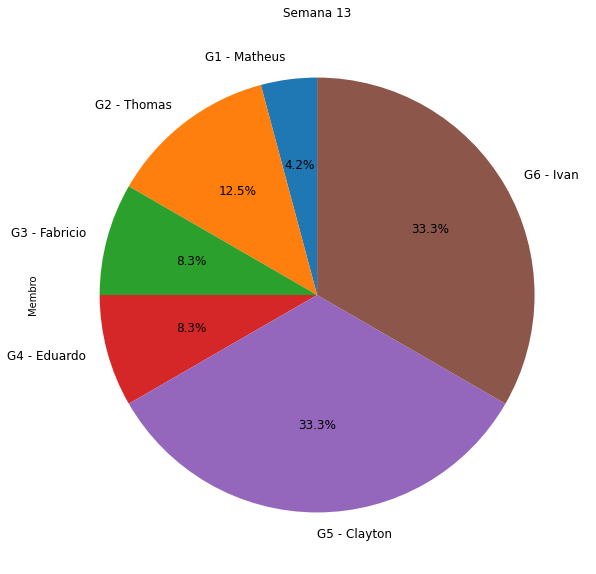

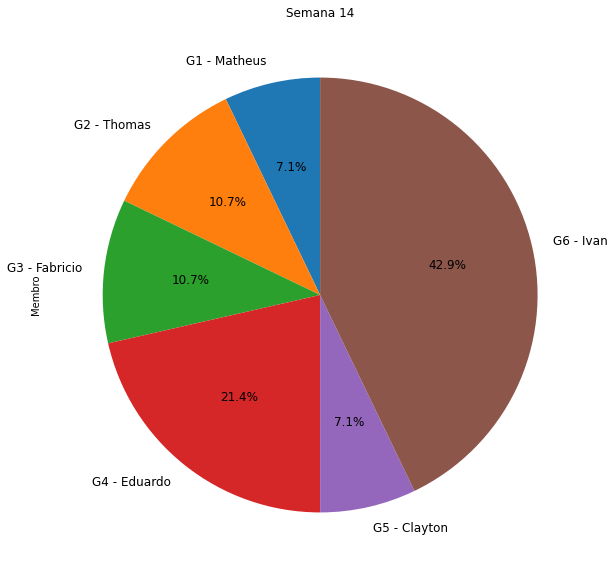

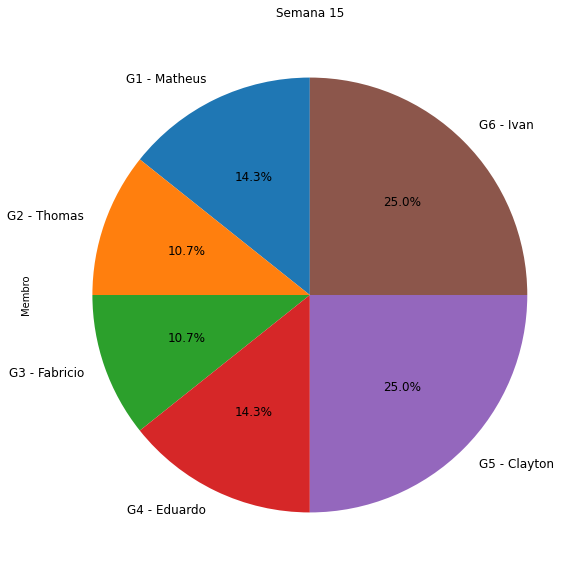

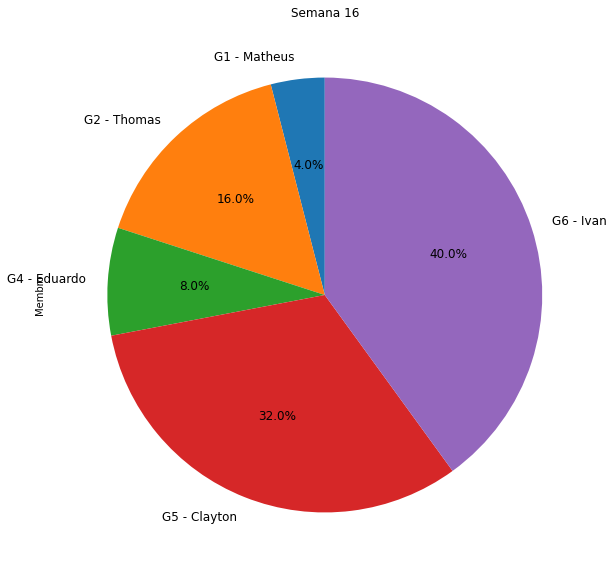

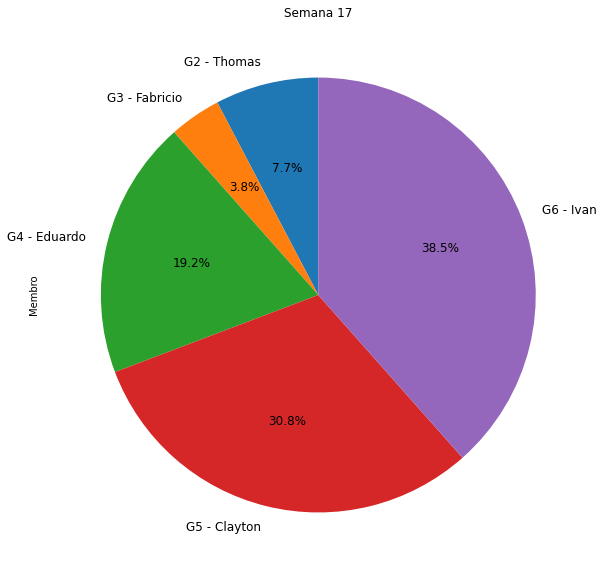

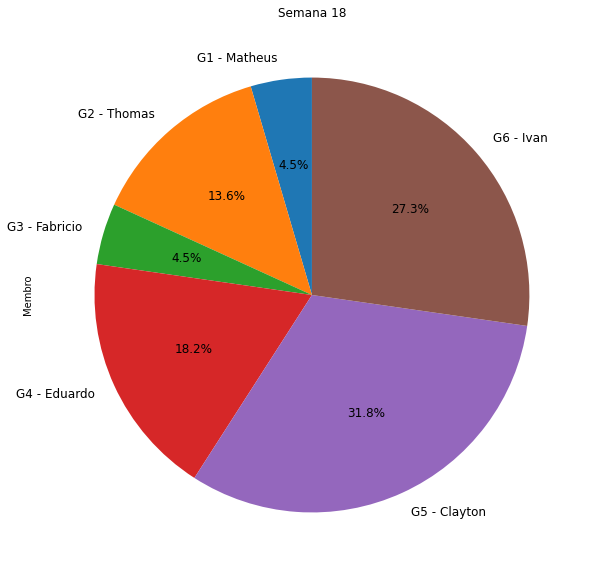

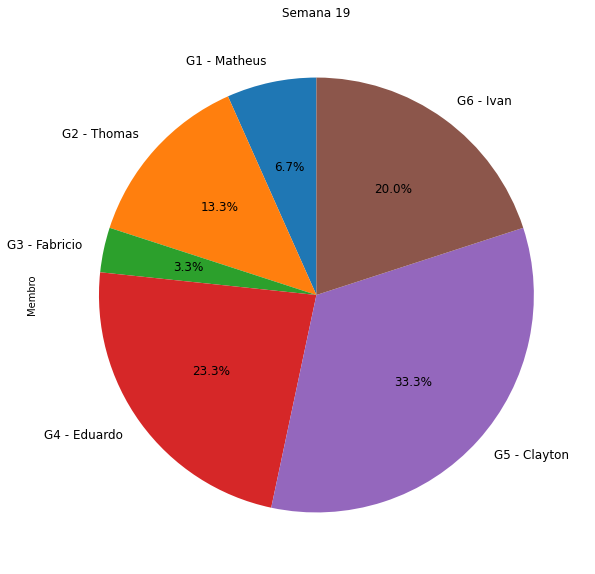

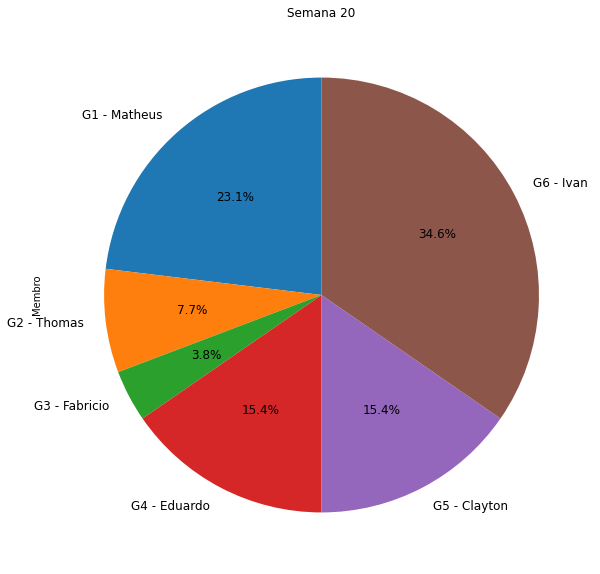

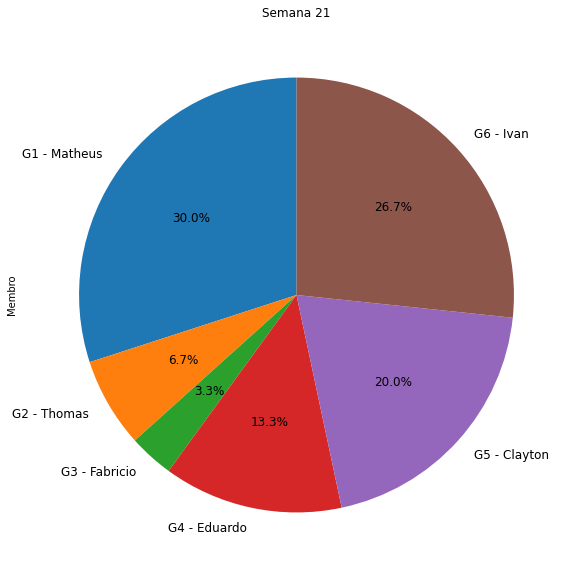

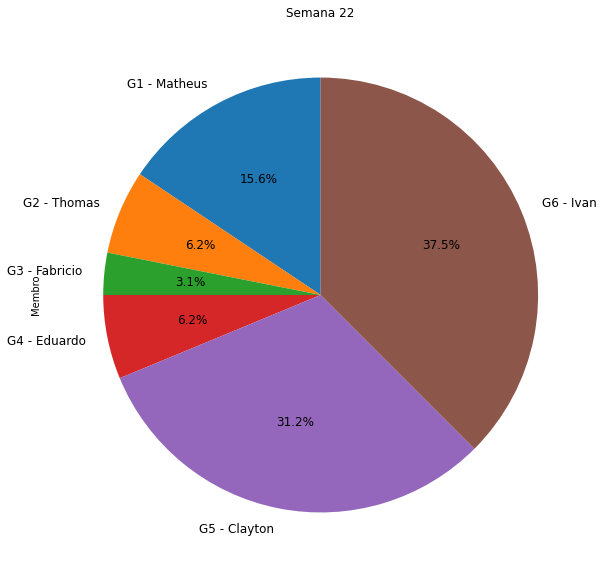

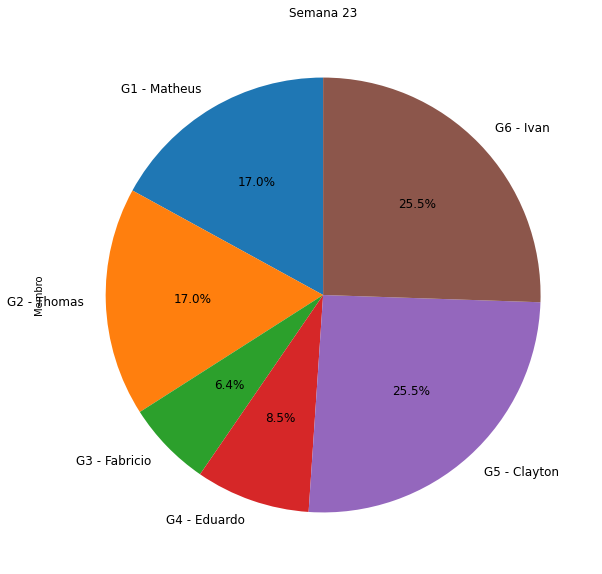

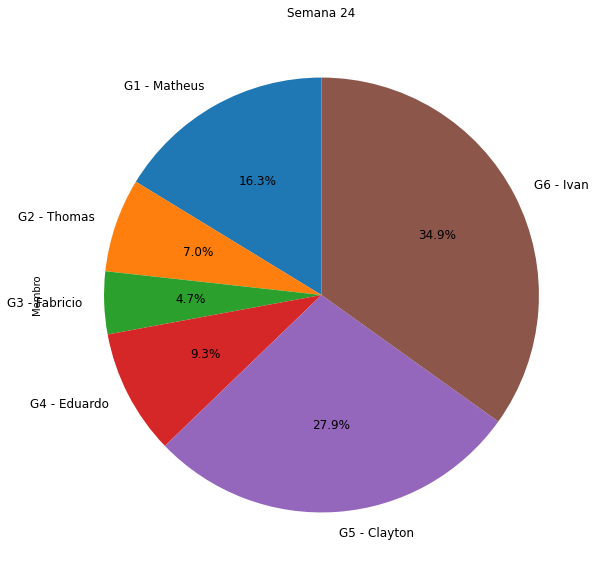

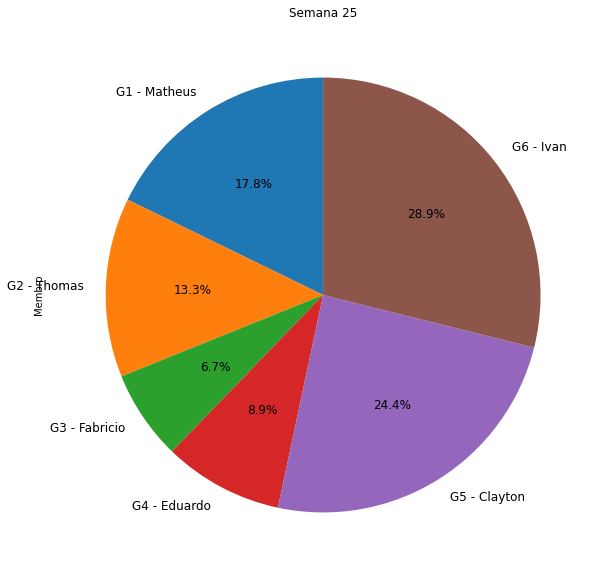

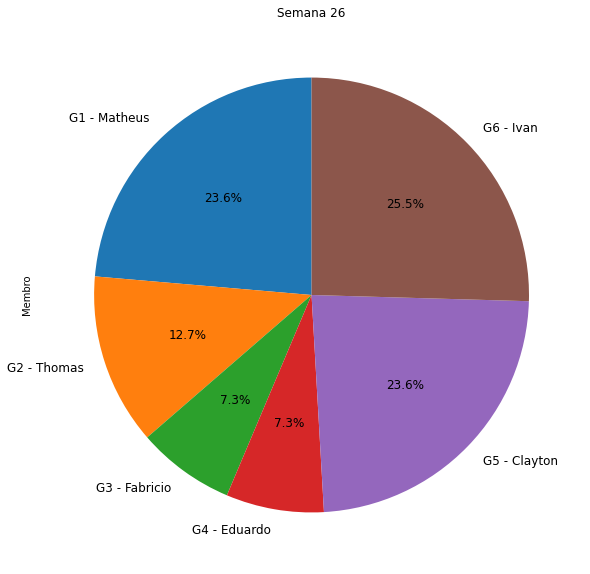

In [5]:
timeline = list()
for week in range(1,27):
    df, total, unique, countGA = EBDStatistics(week)
    WriteExcel(df, total, unique, countGA, week)
    timeline.append((df, total, unique, countGA, week))
    PlotCountGA(week, countGA)

In [6]:
def GetListDetails(feature):
    details = list()
    for week in range(0,len(timeline)):
        details.append(timeline[week][feature]['Membro'].count())
    return details

In [7]:
features = {'Total': 0, 'Unique': 2}

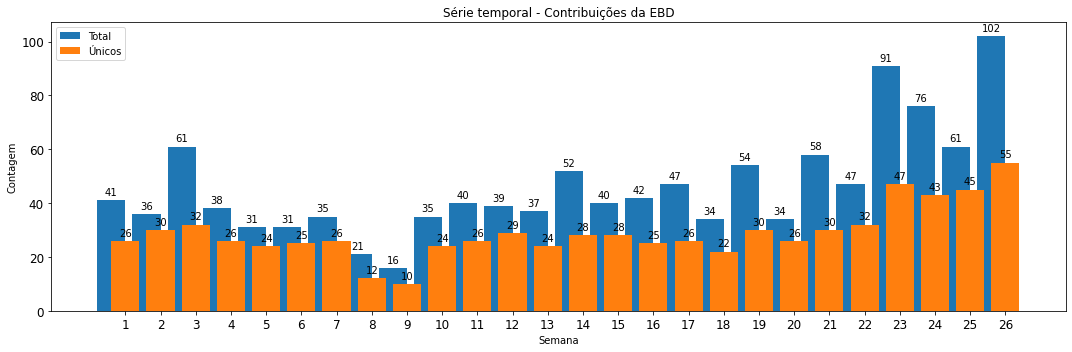

In [8]:
labels = range(1,len(timeline)+1)
total = GetListDetails(features['Total'])
unique = GetListDetails(features['Unique'])

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total, width, label='Total')
rects2 = ax.bar(x, unique, width, label='Únicos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Contagem')
ax.set_xlabel('Semana')
ax.set_title('Série temporal - Contribuições da EBD')
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_size_inches(15,5)
fig.tight_layout()

plt.savefig(r'/Users/fabriciovilasboas/source/repos/EBD/fig/TimelineEBD.png')

In [9]:
allParticipants = pd.concat([timeline[i][2] for i in range(0,24)])

In [10]:
count = allParticipants.groupby('Membro').count()

In [11]:
efficiency = count/26

In [12]:
efficiency.sort_values('G.A').to_excel(r'/Users/fabriciovilasboas/source/repos/EBD/xlsx/Efficiency.xlsx')

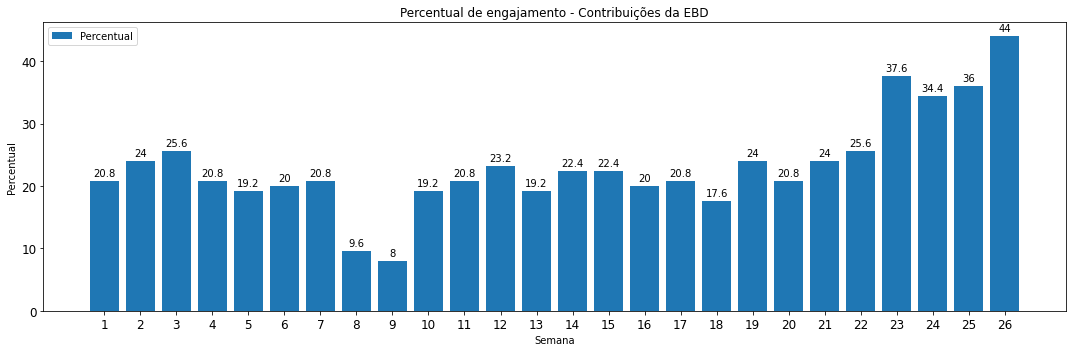

In [15]:
labels = range(1,len(timeline)+1)
unique = GetListDetails(features['Unique'])

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
percents = (np.array(unique)/125)*100
rects2 = ax.bar(x, percents, width, label='Percentual')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentual')
ax.set_xlabel('Semana')
ax.set_title('Percentual de engajamento - Contribuições da EBD')
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects2, padding=3)

fig.set_size_inches(15,5)
fig.tight_layout()

plt.savefig(r'/Users/fabriciovilasboas/source/repos/EBD/fig/Engajamento.png')